In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import seaborn as sns
import time

from game import *
from utils import *
from plots import *
from agents import *
from T4T import *

palette = sns.color_palette("colorblind")
sns.set_palette(palette)
sns.set(context='paper', style='white', font='CMU Serif', rc={'font.size':12, 'mathtext.fontset': 'cm'})

In [2]:
def run_greedy_trustee(agents, nGames, verbose=False, train=True):
    dfs = []
    for a, agent in enumerate(agents):
        if verbose: print(f"{agent.ID}")
        seed = a if train else 1000+a
        t4ts = make_greedy_trustees(nGames, seed=seed)
        for g in range(nGames):
            if verbose: print(f"game {g}")
            df = play_game(agent, t4ts[g], gameID=g, train=train)
            dfs.extend(df)
        del(agent)
    data = pd.concat(dfs, ignore_index=True)
    return data

# DQN

150 games

final strategy: G=0.052, S=9.5


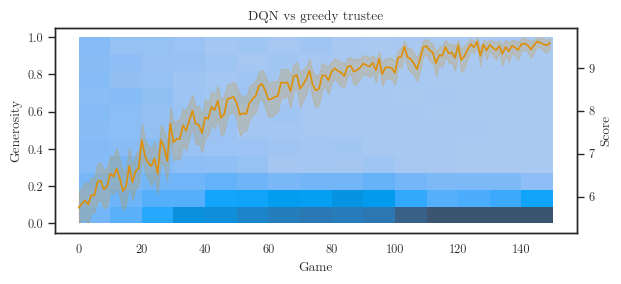

In [20]:
nAgents = 30
nGames_train = 150
nGames_test = 10

agents = []
for n in range(nAgents):
    agents.append(
        DQN(
            'investor',
            ID=f"DQN{n}",
            seed=n,
            nNeurons=50,
            alpha=0.05,
            gamma=0.5,
            tau=4,
            explore='exponential',
            update='SARSA',
            w_s=1.0,
            w_o=0.0,
            w_i=0.0,
            nGames=nGames_train)
    )

agentIDs = [agent.ID for agent in agents]
DQN_train = run_greedy_trustee(agents, nGames=nGames_train, train=True).query("ID in @agentIDs")
DQN_test = run_greedy_trustee(agents, nGames=nGames_test, train=False).query("ID in @agentIDs")
DQN_train.to_pickle("data/DQN_LT1.pkl")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=((6.38, 3)))
sns.histplot(data=DQN_train, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames_train),(0, 1)), ax=ax, color=palette[0])
ax2 = ax.twinx()
sns.lineplot(data=DQN_train, x='game', y='coins', ax=ax2, color=palette[1])
ax.set(title='DQN vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score')
plt.tight_layout()

meanG = DQN_test.query("ID in @agentIDs")['generosity'].mean()
meanS = DQN_test.query("ID in @agentIDs")['coins'].mean()
print(f"final strategy: G={meanG:.2}, S={meanS:.2}")

15 games, optimized parameters for score

DQN0
DQN1
DQN2
DQN3
DQN4
DQN5
DQN6
DQN7
DQN8
DQN9
DQN10
DQN11
DQN12
DQN13
DQN14
DQN15
DQN16
DQN17
DQN18
DQN19
DQN20
DQN21
DQN22
DQN23
DQN24
DQN25
DQN26
DQN27
DQN28
DQN29
DQN30
DQN31
DQN32
DQN33
DQN34
DQN35
DQN36
DQN37
DQN38
DQN39
DQN40
DQN41
DQN42
DQN43
DQN44
DQN45
DQN46
DQN47
DQN48
DQN49
DQN50
DQN51
DQN52
DQN53
DQN54
DQN55
DQN56
DQN57
DQN58
DQN59
DQN60
DQN61
DQN62
DQN63
DQN64
DQN65
DQN66
DQN67
DQN68
DQN69
DQN70
DQN71
DQN72
DQN73
DQN74
DQN75
DQN76
DQN77
DQN78
DQN79
DQN80
DQN81
DQN82
DQN83
DQN84
DQN85
DQN86
DQN87
DQN88
DQN89
DQN90
DQN91
DQN92
DQN93
DQN94
DQN95
DQN96
DQN97
DQN98
DQN99
DQN0
DQN1
DQN2
DQN3
DQN4
DQN5
DQN6
DQN7
DQN8
DQN9
DQN10
DQN11
DQN12
DQN13
DQN14
DQN15
DQN16
DQN17
DQN18
DQN19
DQN20
DQN21
DQN22
DQN23
DQN24
DQN25
DQN26
DQN27
DQN28
DQN29
DQN30
DQN31
DQN32
DQN33
DQN34
DQN35
DQN36
DQN37
DQN38
DQN39
DQN40
DQN41
DQN42
DQN43
DQN44
DQN45
DQN46
DQN47
DQN48
DQN49
DQN50
DQN51
DQN52
DQN53
DQN54
DQN55
DQN56
DQN57
DQN58
DQN59
DQN60
DQN61
DQN62
DQN63
DQN64
DQN65
DQN66
DQN67
DQN68
DQN69


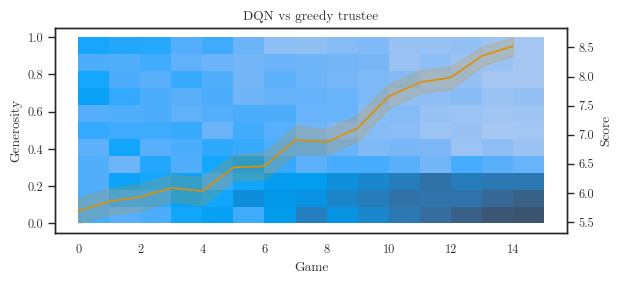

In [10]:
nAgents = 100
nGames_train = 15
nGames_test = 10

agents = []
for n in range(nAgents):
    agents.append(
        DQN(
            'investor',
            ID=f"DQN{n}",
            seed=n,
            nNeurons=32,
            tau=5.7,
            alpha=0.121,
            gamma=0.1,
            explore='linear',
            update='SARSA',
            w_s=1.0,
            w_o=0.0,
            w_i=0.0,
            nGames=nGames_train)
    )

agentIDs = [agent.ID for agent in agents]
DQN_train = run_greedy_trustee(agents, nGames=nGames_train, train=True).query("ID in @agentIDs")
DQN_test = run_greedy_trustee(agents, nGames=nGames_test, train=False).query("ID in @agentIDs")
DQN_train.to_pickle("data/DQN_LT2.pkl")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=((6.38, 3)))
sns.histplot(data=DQN_train.query("ID in @agentIDs"), x='game', y='generosity',
             bins=(15, 11), binrange=((0, nGames_train),(0, 1)), ax=ax, color=palette[0])
# sns.lineplot(data=data_train.query("ID in @agentIDs"), x='game', y='generosity', ax=ax, color=palette[1])
ax2 = ax.twinx()
sns.lineplot(data=DQN_train, x='game', y='coins', ax=ax2, color=palette[1])
ax.set(title='DQN vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score')
plt.tight_layout()

meanG = DQN_test.query("ID in @agentIDs")['generosity'].mean()
meanS = DQN_test.query("ID in @agentIDs")['coins'].mean()
print(f"final strategy: G={meanG:.2}, S={meanS:.2}")

# IBL

150 games

final strategy: G=0.013, S=9.9


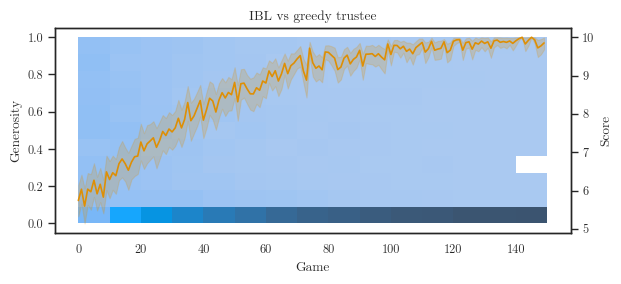

In [22]:
nAgents = 30
nGames_train = 150
nGames_test = 10

agents = []
for n in range(nAgents):
    agents.append(
        IBL(
            'investor',
            ID=f"IBL{n}",
            seed=n,
            gamma=0.9,
            tau=4,
            thrA=0.3,
            explore='exponential',
            w_s=1.0,
            w_o=0.0,
            w_i=0.0,
            nGames=nGames_train)
    )

agentIDs = [agent.ID for agent in agents]
IBL_train = run_greedy_trustee(agents, nGames=nGames_train, train=True).query("ID in @agentIDs")
IBL_test = run_greedy_trustee(agents, nGames=nGames_test, train=False).query("ID in @agentIDs")
IBL_train.to_pickle("data/IBL_LT1.pkl")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=((6.38, 3)))
sns.histplot(data=IBL_train.query("ID in @agentIDs"), x='game', y='generosity',
             bins=(15, 11), binrange=((0, nGames_train),(0, 1)), ax=ax, color=palette[0])
# sns.lineplot(data=data_train.query("ID in @agentIDs"), x='game', y='generosity', ax=ax, color=palette[1])
ax2 = ax.twinx()
sns.lineplot(data=IBL_train, x='game', y='coins', ax=ax2, color=palette[1])
ax.set(title='IBL vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score')
plt.tight_layout()

meanG = IBL_test.query("ID in @agentIDs")['generosity'].mean()
meanS = IBL_test.query("ID in @agentIDs")['coins'].mean()
print(f"final strategy: G={meanG:.2}, S={meanS:.2}")

15 games

IBL0
IBL1
IBL2
IBL3
IBL4
IBL5
IBL6
IBL7
IBL8
IBL9
IBL10
IBL11
IBL12
IBL13
IBL14
IBL15
IBL16
IBL17
IBL18
IBL19
IBL20
IBL21
IBL22
IBL23
IBL24
IBL25
IBL26
IBL27
IBL28
IBL29
IBL30
IBL31
IBL32
IBL33
IBL34
IBL35
IBL36
IBL37
IBL38
IBL39
IBL40
IBL41
IBL42
IBL43
IBL44
IBL45
IBL46
IBL47
IBL48
IBL49
IBL0
IBL1
IBL2
IBL3
IBL4
IBL5
IBL6
IBL7
IBL8
IBL9
IBL10
IBL11
IBL12
IBL13
IBL14
IBL15
IBL16
IBL17
IBL18
IBL19
IBL20
IBL21
IBL22
IBL23
IBL24
IBL25
IBL26
IBL27
IBL28
IBL29
IBL30
IBL31
IBL32
IBL33
IBL34
IBL35
IBL36
IBL37
IBL38
IBL39
IBL40
IBL41
IBL42
IBL43
IBL44
IBL45
IBL46
IBL47
IBL48
IBL49
final strategy: G=0.014, S=9.9


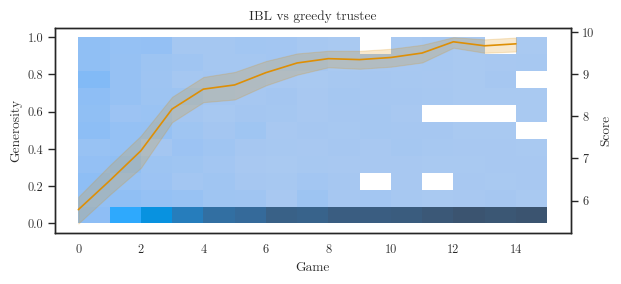

In [6]:
nAgents = 50
nGames_train = 15
nGames_test = 10

agents = []
for n in range(nAgents):
    agents.append(
        IBL(
            'investor',
            ID=f"IBL{n}",
            seed=n,
            gamma=0.66,
            tau=9.5,
            explore='exponential',
            w_s=1.0,
            w_o=0.0,
            w_i=0.0,
            nGames=nGames_train)
    )

agentIDs = [agent.ID for agent in agents]
IBL_train = run_greedy_trustee(agents, nGames=nGames_train, train=True).query("ID in @agentIDs")
IBL_test = run_greedy_trustee(agents, nGames=nGames_test, train=False).query("ID in @agentIDs")
IBL_train.to_pickle("data/IBL_LT2.pkl")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=((6.38, 3)))
sns.histplot(data=IBL_train.query("ID in @agentIDs"), x='game', y='generosity',
             bins=(15, 11), binrange=((0, nGames_train),(0, 1)), ax=ax, color=palette[0])
# sns.lineplot(data=data_train.query("ID in @agentIDs"), x='game', y='generosity', ax=ax, color=palette[1])
ax2 = ax.twinx()
sns.lineplot(data=IBL_train, x='game', y='coins', ax=ax2, color=palette[1])
ax.set(title='IBL vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score')
plt.tight_layout()

meanG = IBL_test.query("ID in @agentIDs")['generosity'].mean()
meanS = IBL_test.query("ID in @agentIDs")['coins'].mean()
print(f"final strategy: G={meanG:.2}, S={meanS:.2}")

15 games with memory constraints

final strategy: G=0.058, S=9.5


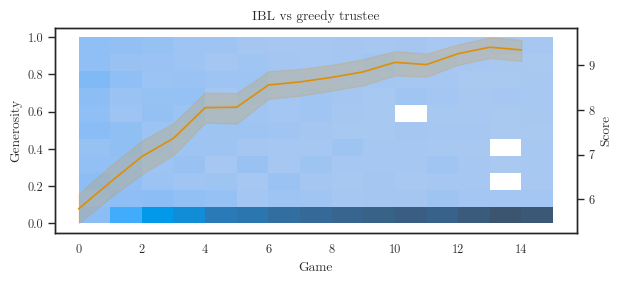

In [6]:
nAgents = 50
nGames_train = 15
nGames_test = 10

agents = []
for n in range(nAgents):
    agents.append(
        IBL(
            'investor',
            ID=f"IBL{n}",
            seed=n,
            gamma=0.5,
            tau=10,
            explore='exponential',
            thrA=0.2,
            w_s=1.0,
            w_o=0.0,
            w_i=0.0,
            nGames=nGames_train)
    )

agentIDs = [agent.ID for agent in agents]
IBL_train = run_greedy_trustee(agents, nGames=nGames_train, train=True).query("ID in @agentIDs")
IBL_test = run_greedy_trustee(agents, nGames=nGames_test, train=False).query("ID in @agentIDs")
IBL_train.to_pickle("data/IBL_LT3.pkl")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=((6.38, 3)))
sns.histplot(data=IBL_train.query("ID in @agentIDs"), x='game', y='generosity',
             bins=(15, 11), binrange=((0, nGames_train),(0, 1)), ax=ax, color=palette[0])
# sns.lineplot(data=data_train.query("ID in @agentIDs"), x='game', y='generosity', ax=ax, color=palette[1])
ax2 = ax.twinx()
sns.lineplot(data=IBL_train, x='game', y='coins', ax=ax2, color=palette[1])
ax.set(title='IBL vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score')
plt.tight_layout()

meanG = IBL_test.query("ID in @agentIDs")['generosity'].mean()
meanS = IBL_test.query("ID in @agentIDs")['coins'].mean()
print(f"final strategy: G={meanG:.2}, S={meanS:.2}")

# NEF

In [3]:
name='long'
nAgents = 1
nGames_train = 15
nGames_test = 10

agents = []
for n in range(nAgents):
    agents.append(
        NEF(
            'investor',
            ID=f"NEF{n}",
            seed=n,
            alpha=1e-7,
            nEns=1000,
            nArr=300,
            nStates=10,
            explore='linear',
            w_s=1.0,
            w_o=0.0,
            w_i=0.0,
            nGames=nGames_train)
    )

agentIDs = [agent.ID for agent in agents]
start = time.time()
NEF_train = run_greedy_trustee(agents, nGames=nGames_train, train=True, verbose=True).query("ID in @agentIDs")
NEF_test = run_greedy_trustee(agents, nGames=nGames_test, train=False, verbose=True).query("ID in @agentIDs")
end = time.time()
print(f"time: {end-start:.3}")
NEF_train.to_pickle(f"data/NEF_LT1_{name}.pkl")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=((6.38, 3)))
sns.histplot(data=NEF_train, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames_train),(0, 1)), ax=ax, color=palette[0])
ax2 = ax.twinx()
sns.lineplot(data=NEF_train, x='game', y='coins', ax=ax2, color=palette[1])
ax.set(title='NEF vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score')
fig.savefig(f"plots/NEF_LT1_{name}.png")
plt.tight_layout()

meanG = NEF_test.query("ID in @agentIDs")['generosity'].mean()
meanS = NEF_test.query("ID in @agentIDs")['coins'].mean()
print(f"final strategy: G={meanG:.2}, S={meanS:.2}")

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

NEF0
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8


KeyboardInterrupt: 

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

NEF0
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF1
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF2
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF3
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF4
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF5
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF6
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF7
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF8
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 

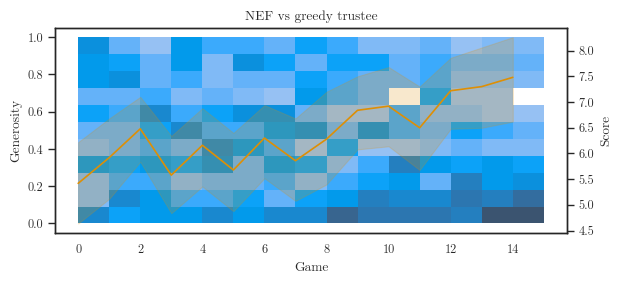

In [4]:
name='baseline'
nAgents = 10
nGames_train = 15
nGames_test = 5

agents = []
for n in range(nAgents):
    agents.append(
        NEF(
            'investor',
            ID=f"NEF{n}",
            seed=n,
            alpha=1e-7,
            nEns=1000,
            nArr=100,
            explore='linear',
            w_s=1.0,
            w_o=0.0,
            w_i=0.0,
            nGames=nGames_train)
    )

agentIDs = [agent.ID for agent in agents]
start = time.time()
NEF_train = run_greedy_trustee(agents, nGames=nGames_train, train=True, verbose=True).query("ID in @agentIDs")
NEF_test = run_greedy_trustee(agents, nGames=nGames_test, train=False, verbose=True).query("ID in @agentIDs")
end = time.time()
print(f"time: {end-start:.3}")
NEF_train.to_pickle(f"data/NEF_LT1_{name}.pkl")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=((6.38, 3)))
sns.histplot(data=NEF_train, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames_train),(0, 1)), ax=ax, color=palette[0])
ax2 = ax.twinx()
sns.lineplot(data=NEF_train, x='game', y='coins', ax=ax2, color=palette[1])
ax.set(title='NEF vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score')
fig.savefig(f"plots/NEF_LT1_{name}.png")
plt.tight_layout()

meanG = NEF_test.query("ID in @agentIDs")['generosity'].mean()
meanS = NEF_test.query("ID in @agentIDs")['coins'].mean()
print(f"final strategy: G={meanG:.2}, S={meanS:.2}")

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

NEF0
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF1
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF2
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF3
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF4
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF5
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF6
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF7
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF8
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 

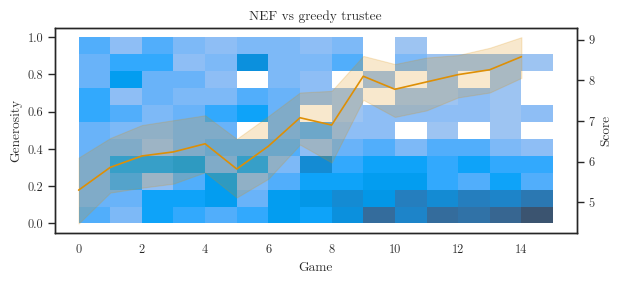

In [5]:
name='nArr300'
nAgents = 10
nGames_train = 15
nGames_test = 5

agents = []
for n in range(nAgents):
    agents.append(
        NEF(
            'investor',
            ID=f"NEF{n}",
            seed=n,
            alpha=1e-7,
            nEns=1000,
            nArr=300,
            explore='linear',
            w_s=1.0,
            w_o=0.0,
            w_i=0.0,
            nGames=nGames_train)
    )

agentIDs = [agent.ID for agent in agents]
start = time.time()
NEF_train = run_greedy_trustee(agents, nGames=nGames_train, train=True, verbose=True).query("ID in @agentIDs")
NEF_test = run_greedy_trustee(agents, nGames=nGames_test, train=False, verbose=True).query("ID in @agentIDs")
end = time.time()
print(f"time: {end-start:.3}")
NEF_train.to_pickle(f"data/NEF_LT1_{name}.pkl")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=((6.38, 3)))
sns.histplot(data=NEF_train, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames_train),(0, 1)), ax=ax, color=palette[0])
ax2 = ax.twinx()
sns.lineplot(data=NEF_train, x='game', y='coins', ax=ax2, color=palette[1])
ax.set(title='NEF vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score')
fig.savefig(f"plots/NEF_LT1_{name}.png")
plt.tight_layout()

meanG = NEF_test.query("ID in @agentIDs")['generosity'].mean()
meanS = NEF_test.query("ID in @agentIDs")['coins'].mean()
print(f"final strategy: G={meanG:.2}, S={meanS:.2}")

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

NEF0
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF1
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF2
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF3
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF4
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF5
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF6
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF7
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF8
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 

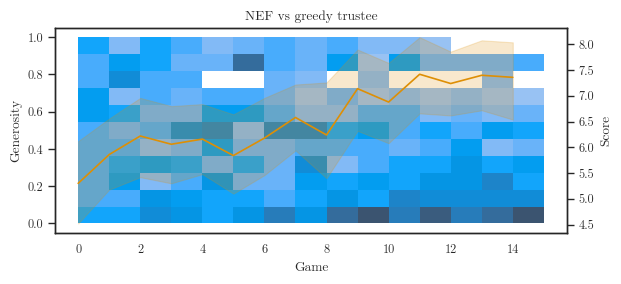

In [6]:
name='alpha1e8'
nAgents = 10
nGames_train = 15
nGames_test = 5

agents = []
for n in range(nAgents):
    agents.append(
        NEF(
            'investor',
            ID=f"NEF{n}",
            seed=n,
            alpha=1e-8,
            nEns=1000,
            nArr=100,
            explore='linear',
            w_s=1.0,
            w_o=0.0,
            w_i=0.0,
            nGames=nGames_train)
    )

agentIDs = [agent.ID for agent in agents]
start = time.time()
NEF_train = run_greedy_trustee(agents, nGames=nGames_train, train=True, verbose=True).query("ID in @agentIDs")
NEF_test = run_greedy_trustee(agents, nGames=nGames_test, train=False, verbose=True).query("ID in @agentIDs")
end = time.time()
print(f"time: {end-start:.3}")
NEF_train.to_pickle(f"data/NEF_LT1_{name}.pkl")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=((6.38, 3)))
sns.histplot(data=NEF_train, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames_train),(0, 1)), ax=ax, color=palette[0])
ax2 = ax.twinx()
sns.lineplot(data=NEF_train, x='game', y='coins', ax=ax2, color=palette[1])
ax.set(title='NEF vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score')
fig.savefig(f"plots/NEF_LT1_{name}.png")
plt.tight_layout()

meanG = NEF_test.query("ID in @agentIDs")['generosity'].mean()
meanS = NEF_test.query("ID in @agentIDs")['coins'].mean()
print(f"final strategy: G={meanG:.2}, S={meanS:.2}")

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

NEF0
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF1
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF2
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF3
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF4
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF5
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF6
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF7
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF8
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 

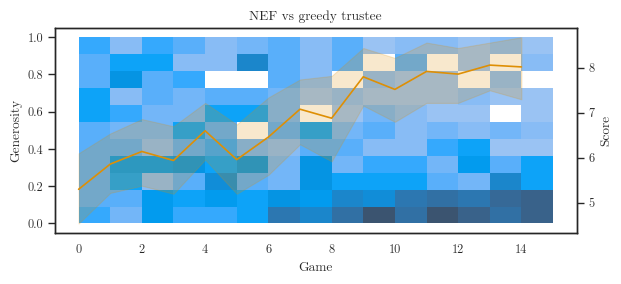

In [7]:
name='nArr300alpha1e6'
nAgents = 10
nGames_train = 15
nGames_test = 5

agents = []
for n in range(nAgents):
    agents.append(
        NEF(
            'investor',
            ID=f"NEF{n}",
            seed=n,
            alpha=1e-6,
            nEns=1000,
            nArr=300,
            explore='linear',
            w_s=1.0,
            w_o=0.0,
            w_i=0.0,
            nGames=nGames_train)
    )

agentIDs = [agent.ID for agent in agents]
start = time.time()
NEF_train = run_greedy_trustee(agents, nGames=nGames_train, train=True, verbose=True).query("ID in @agentIDs")
NEF_test = run_greedy_trustee(agents, nGames=nGames_test, train=False, verbose=True).query("ID in @agentIDs")
end = time.time()
print(f"time: {end-start:.3}")
NEF_train.to_pickle(f"data/NEF_LT1_{name}.pkl")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=((6.38, 3)))
sns.histplot(data=NEF_train, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames_train),(0, 1)), ax=ax, color=palette[0])
ax2 = ax.twinx()
sns.lineplot(data=NEF_train, x='game', y='coins', ax=ax2, color=palette[1])
ax.set(title='NEF vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score')
fig.savefig(f"plots/NEF_LT1_{name}.png")
plt.tight_layout()

meanG = NEF_test.query("ID in @agentIDs")['generosity'].mean()
meanS = NEF_test.query("ID in @agentIDs")['coins'].mean()
print(f"final strategy: G={meanG:.2}, S={meanS:.2}")

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

NEF0
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF1
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF2
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF3
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF4
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF5
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF6
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF7
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 10
game 11
game 12
game 13
game 14
NEF8
game 0
game 1
game 2
game 3
game 4
game 5
game 6
game 7
game 8
game 9
game 

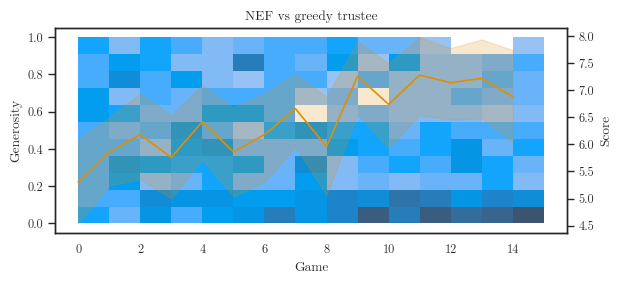

In [9]:
name='nArr200alpha1e8'
nAgents = 10
nGames_train = 15
nGames_test = 5

agents = []
for n in range(nAgents):
    agents.append(
        NEF(
            'investor',
            ID=f"NEF{n}",
            seed=n,
            alpha=1e-8,
            nEns=1000,
            nArr=200,
            explore='linear',
            w_s=1.0,
            w_o=0.0,
            w_i=0.0,
            nGames=nGames_train)
    )

agentIDs = [agent.ID for agent in agents]
start = time.time()
NEF_train = run_greedy_trustee(agents, nGames=nGames_train, train=True, verbose=True).query("ID in @agentIDs")
NEF_test = run_greedy_trustee(agents, nGames=nGames_test, train=False, verbose=True).query("ID in @agentIDs")
end = time.time()
print(f"time: {end-start:.3}")
NEF_train.to_pickle(f"data/NEF_LT1_{name}.pkl")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=((6.38, 3)))
sns.histplot(data=NEF_train, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames_train),(0, 1)), ax=ax, color=palette[0])
ax2 = ax.twinx()
sns.lineplot(data=NEF_train, x='game', y='coins', ax=ax2, color=palette[1])
ax.set(title='NEF vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax2.set(ylabel='Score')
fig.savefig(f"plots/NEF_LT1_{name}.png")
plt.tight_layout()

meanG = NEF_test.query("ID in @agentIDs")['generosity'].mean()
meanS = NEF_test.query("ID in @agentIDs")['coins'].mean()
print(f"final strategy: G={meanG:.2}, S={meanS:.2}")

# empirical

In [ ]:
emp = pd.read_pickle("human_data.pkl")
data = emp.query("orientation=='proself' & opponent=='greedy' & player=='investor'")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=((6.38, 3)))
sns.lineplot(data=data, x='game', y='coins', ax=axes[0], color=palette[7])
sns.lineplot(data=data, x='game', y='generosity', ax=axes[1], color=palette[7])
axes[0].set(xlabel='Game', ylabel='Score', yticks=((5,6,7,8,9,10)))
axes[1].set(xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
plt.tight_layout()

xs = np.arange(0, 15, 1)
yN = 11
yN2 = 6
ys = np.linspace(0, 1, yN2)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=((6.38, 2)))
sns.histplot(data=data, x='game', y='generosity', bins=(15, yN), binrange=((0, 15),(0, 1)), ax=axes, color=palette[0])
axes2 = axes.twinx()
sns.lineplot(data=data, x='game', y='coins', ax=axes2, color=palette[1])
axes.set(ylabel="Generosity", title=f'proself humans vs. greedy trustee', xticks=xs, xlim=((0, 14)), yticks=ys, ylim=((min(ys), max(ys))))
axes2.set(ylabel='Score')
plt.tight_layout()

# Combined Plot

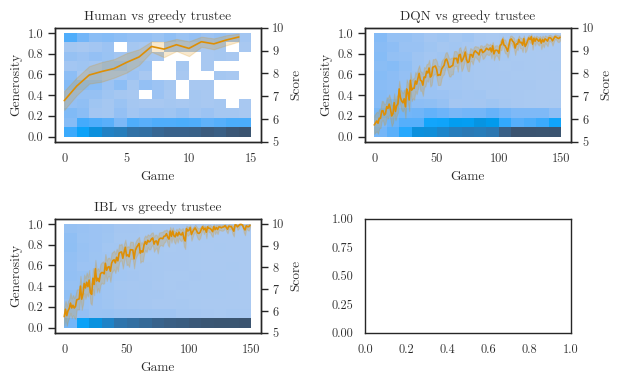

In [21]:
data_human = pd.read_pickle("data/human_data_cleaned.pkl").query("orientation=='proself' & opponent=='greedy' & player=='investor'")
data_dqn = pd.read_pickle("data/DQN_LT1.pkl")
data_ibl = pd.read_pickle("data/IBL_LT1.pkl")
data_nef = pd.read_pickle("data/NEF_LT1.pkl")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=((6.38, 4)))
sns.histplot(data=data_human, x='game', y='generosity', bins=(15, 11), binrange=((0, 15),(0, 1)), ax=axes[0][0], color=palette[0])
ax = axes[0][0].twinx()
sns.lineplot(data=data_human, x='game', y='coins', ax=ax, color=palette[1])
axes[0][0].set(title='Human vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax.set(ylabel='Score', yticks=((5,6,7,8,9,10)))

sns.histplot(data=data_dqn, x='game', y='generosity', bins=(15, 11), binrange=((0, 150),(0, 1)), ax=axes[0][1], color=palette[0])
ax = axes[0][1].twinx()
sns.lineplot(data=data_dqn, x='game', y='coins', ax=ax, color=palette[1])
axes[0][1].set(title='DQN vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax.set(ylabel='Score', yticks=((5,6,7,8,9,10)))

sns.histplot(data=data_ibl, x='game', y='generosity', bins=(15, 11), binrange=((0, 150),(0, 1)), ax=axes[1][0], color=palette[0])
ax = axes[1][0].twinx()
sns.lineplot(data=data_ibl, x='game', y='coins', ax=ax, color=palette[1])
axes[1][0].set(title='IBL vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax.set(ylabel='Score', yticks=((5,6,7,8,9,10)))

# sns.histplot(data=data_nef, x='game', y='generosity', bins=(15, 11), binrange=((0, 150),(0, 1)), ax=axes[1][1], color=palette[0])
# ax = axes[1][1].twinx()
# sns.lineplot(data=data_nef, x='game', y='coins', ax=ax, color=palette[1])
# axes[1][1].set(title='NEF vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
# ax.set(ylabel='Score', yticks=((5,6,7,8,9,10)))

plt.tight_layout()
fig.savefig(f"plots/combined_LT1.png")

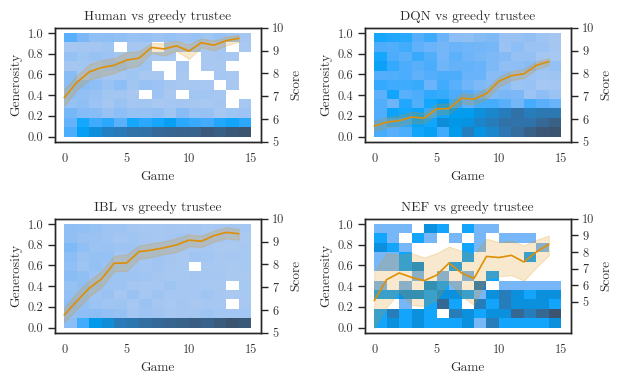

In [7]:
data_human = pd.read_pickle("data/human_data_cleaned.pkl").query("orientation=='proself' & opponent=='greedy' & player=='investor'")
data_dqn = pd.read_pickle("data/DQN_LT2.pkl")
data_ibl = pd.read_pickle("data/IBL_LT3.pkl")
data_nef = pd.read_pickle("data/NEF_LT1.pkl")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=((6.38, 4)))
sns.histplot(data=data_human, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames_train),(0, 1)), ax=axes[0][0], color=palette[0])
ax = axes[0][0].twinx()
sns.lineplot(data=data_human, x='game', y='coins', ax=ax, color=palette[1])
axes[0][0].set(title='Human vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax.set(ylabel='Score', yticks=((5,6,7,8,9,10)))

sns.histplot(data=data_dqn, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames_train),(0, 1)), ax=axes[0][1], color=palette[0])
ax = axes[0][1].twinx()
sns.lineplot(data=data_dqn, x='game', y='coins', ax=ax, color=palette[1])
axes[0][1].set(title='DQN vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax.set(ylabel='Score', yticks=((5,6,7,8,9,10)))

sns.histplot(data=data_ibl, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames_train),(0, 1)), ax=axes[1][0], color=palette[0])
ax = axes[1][0].twinx()
sns.lineplot(data=data_ibl, x='game', y='coins', ax=ax, color=palette[1])
axes[1][0].set(title='IBL vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax.set(ylabel='Score', yticks=((5,6,7,8,9,10)))

sns.histplot(data=data_nef, x='game', y='generosity', bins=(15, 11), binrange=((0, nGames_train),(0, 1)), ax=axes[1][1], color=palette[0])
ax = axes[1][1].twinx()
sns.lineplot(data=data_nef, x='game', y='coins', ax=ax, color=palette[1])
axes[1][1].set(title='NEF vs greedy trustee', xlabel='Game', ylabel='Generosity', yticks=((0.0, 0.2, 0.4, 0.6, 0.8, 1.0)))
ax.set(ylabel='Score', yticks=((5,6,7,8,9,10)))

plt.tight_layout()
fig.savefig(f"plots/combined_LT2.png")